# Os Silkers

In [ ]:
from load_history import load_history
from train import train
from predict import predict
import polars as pl

In [ ]:
df_pdvs = pl.read_parquet('CAMINHO/data/parquet/pdvs.parquet')
df_produtos = pl.read_parquet('CAMINHO/parquet/produtos.parquet')
df_vendas = pl.read_parquet('CAMINHO/parquet/vendas.parquet')

In [4]:
df = df_vendas.join(df_produtos, left_on='internal_product_id', right_on='produto')
df = df.join(df_pdvs, left_on='internal_store_id', right_on='pdv')

In [5]:
df, original_df = load_history(df)
df, original_df

(shape: (6_205_747, 13)
 ┌─────────────┬─────────────┬────────────┬─────────────┬───┬─────────────┬────────────┬─────┬──────┐
 │ pdv         ┆ sku         ┆ semana     ┆ vendas_sema ┆ … ┆ desvio_padr ┆ semana_do_ ┆ mes ┆ ano  │
 │ ---         ┆ ---         ┆ ---        ┆ nais        ┆   ┆ ao_4_semana ┆ ano        ┆ --- ┆ ---  │
 │ str         ┆ str         ┆ date       ┆ ---         ┆   ┆ s           ┆ ---        ┆ i8  ┆ i32  │
 │             ┆             ┆            ┆ f64         ┆   ┆ ---         ┆ i8         ┆     ┆      │
 │             ┆             ┆            ┆             ┆   ┆ f64         ┆            ┆     ┆      │
 ╞═════════════╪═════════════╪════════════╪═════════════╪═══╪═════════════╪════════════╪═════╪══════╡
 │ 10002374870 ┆ 18374296073 ┆ 2022-02-07 ┆ 1.0         ┆ … ┆ null        ┆ 6          ┆ 2   ┆ 2022 │
 │ 41964405    ┆ 27399565    ┆            ┆             ┆   ┆             ┆            ┆     ┆      │
 │ 10002374870 ┆ 18374296073 ┆ 2022-02-14 ┆ 2.0         ┆ 

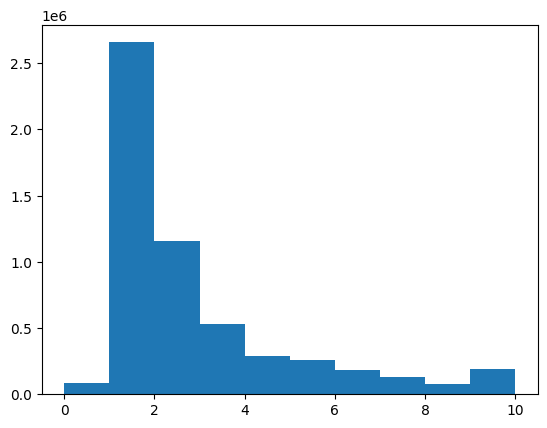

In [6]:
import matplotlib.pyplot as plt

plt.hist(df.to_pandas()['vendas_semanais'].to_numpy(), range=[0, 10])
plt.show()

In [8]:
model = train(df)

         vendas_lag_1  vendas_lag_2  vendas_lag_3  vendas_lag_4  \
0                 0.0           0.0           0.0           0.0   
1                 1.0           0.0           0.0           0.0   
2                 2.0           1.0           0.0           0.0   
3                 1.0           2.0           1.0           0.0   
4                 2.0           1.0           2.0           1.0   
...               ...           ...           ...           ...   
6205742           1.0           0.0           0.0           0.0   
6205743           1.0           1.0           0.0           0.0   
6205744           1.0           1.0           1.0           0.0   
6205745           1.0           1.0           1.0           1.0   
6205746           1.0           1.0           1.0           1.0   

         media_movel_4_semanas  desvio_padrao_4_semanas  semana_do_ano  mes  \
0                          0.0                  0.00000              6    2   
1                          0.0       

In [ ]:
predictions = predict(1, 1, 2023, model, df, '.')

In [10]:
predictions = predictions.astype('int')

In [11]:
predictions

,semana,pdv,produto,quantidade
1018706,1,6715102889362241882,4623814317972718932,1
934234,1,6211011473805988126,7171661338468656007,1
1079393,1,7059328007645110932,6562521907333808722,1
934208,1,6211011473805988126,3748306923636527674,1
934261,1,6211473009596393179,1152772499033912340,1
...,...,...,...,...
2810509,5,5445993542050040998,210620217243421376,3
2810504,5,5445993542050040998,2092400019416897759,3
2810499,5,5445993542050040998,200407080435025895,4
2810551,5,5445993542050040998,2744506899428303850,1


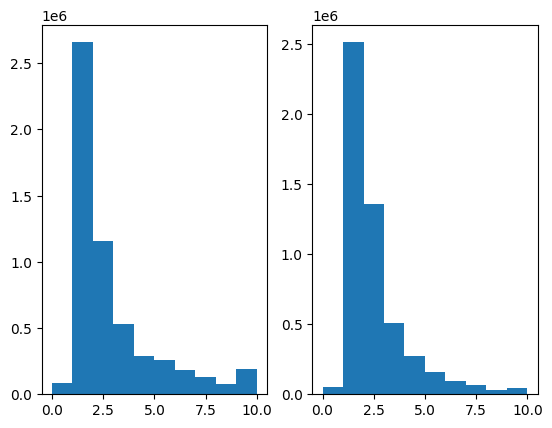

In [12]:
import matplotlib.pyplot as plt


dataset_qts = df.to_pandas()['vendas_semanais'].to_numpy()
predicted_qts = predictions['quantidade'].to_numpy()

axes = plt.subplot(1, 2, 1)
axes.hist(dataset_qts, range=[0, 10])
limit = [0, 5e6]
#axes.set_xlim(limit)
axes2 = plt.subplot(1, 2, 2)
#axes2.set_xlim()
axes2.hist(predicted_qts, range=[0, 10])
plt.show()

In [ ]:
predictions.to_parquet('../saved/saved_pred.parquet')